<a href="https://colab.research.google.com/github/lilreel/KampusMerdika_StudiIndependen_Zenius_AcceleratedMLProgram/blob/main/7.%20Topic13_14_HW_Chalil_Al_Vareel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn import linear_model, metrics

In [ ]:
housedata_csv = 'https://raw.githubusercontent.com/lilreel/Datasets/main/_Miscellaneous/train.csv'
heart_csv = 'https://raw.githubusercontent.com/lilreel/Datasets/main/_Miscellaneous/heart.csv'
housedata = pd.read_csv(housedata_csv)
heart = pd.read_csv(heart_csv)

## 1. Multivariate Linear Regression

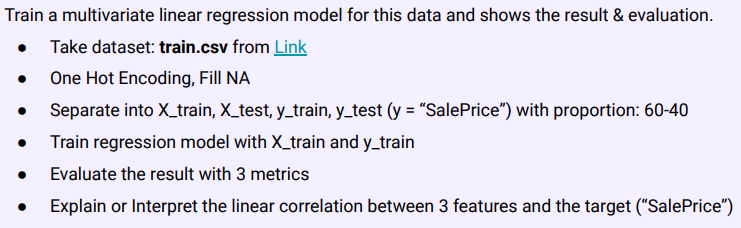

In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
housedata

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [ ]:
housedata.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
housedata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Handling Missing Value

In [ ]:
housedata.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis = 'columns', inplace = True)

In [ ]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
housedata_update = housedata.copy()

floating_cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
housedata_update[floating_cols] = housedata_update[floating_cols].fillna(housedata_update[floating_cols].median())

In [ ]:
housedata_update['MasVnrType'] = housedata_update['MasVnrType'].fillna(housedata_update['MasVnrType'].mode()[0])
housedata_update['BsmtQual'] = housedata_update['BsmtQual'].fillna(housedata_update['BsmtQual'].mode()[0])
housedata_update['BsmtExposure'] = housedata_update['BsmtExposure'].fillna(housedata_update['BsmtExposure'].mode()[0])
housedata_update['BsmtCond'] = housedata_update['BsmtCond'].fillna(housedata_update['BsmtCond'].mode()[0])
housedata_update['BsmtFinType2'] = housedata_update['BsmtFinType2'].fillna(housedata_update['BsmtFinType2'].mode()[0])
housedata_update['Electrical'] = housedata_update['Electrical'].fillna(housedata_update['Electrical'].mode()[0])
housedata_update['GarageType'] = housedata_update['GarageType'].fillna(housedata_update['GarageType'].mode()[0])
housedata_update['GarageFinish'] = housedata_update['GarageFinish'].fillna(housedata_update['GarageFinish'].mode()[0])
housedata_update['GarageQual'] = housedata_update['GarageQual'].fillna(housedata_update['GarageQual'].mode()[0])
housedata_update['GarageCond'] = housedata_update['GarageCond'].fillna(housedata_update['GarageCond'].mode()[0])
housedata_update['BsmtFinType1'] = housedata_update['BsmtFinType1'].fillna(housedata_update['BsmtFinType1'].mode()[0])

In [ ]:
housedata_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Correlation Checking

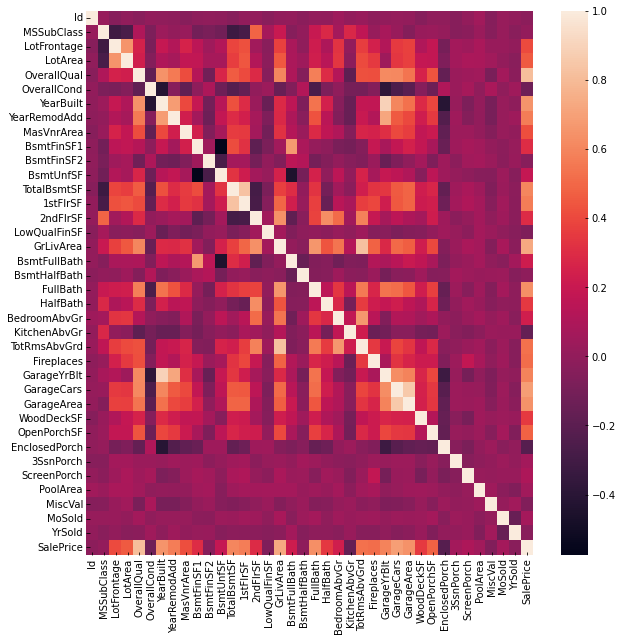

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))       
sns.heatmap(housedata.corr('spearman'), ax = ax)

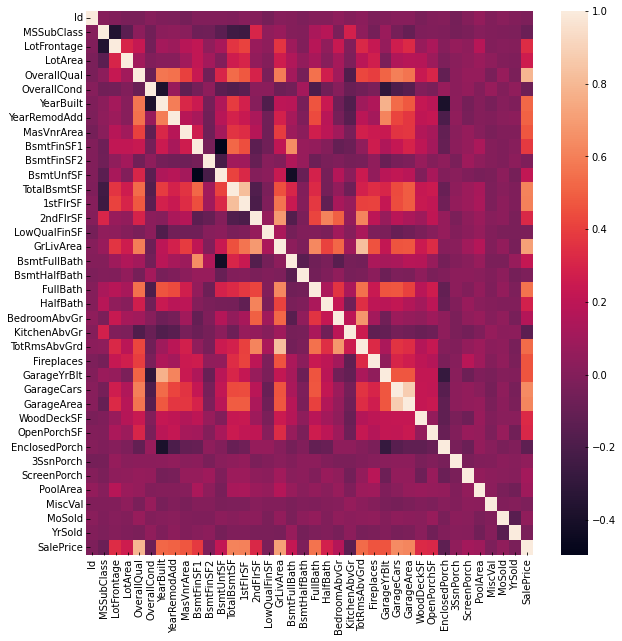

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))       
sns.heatmap(housedata_update.corr('pearson'), ax = ax)

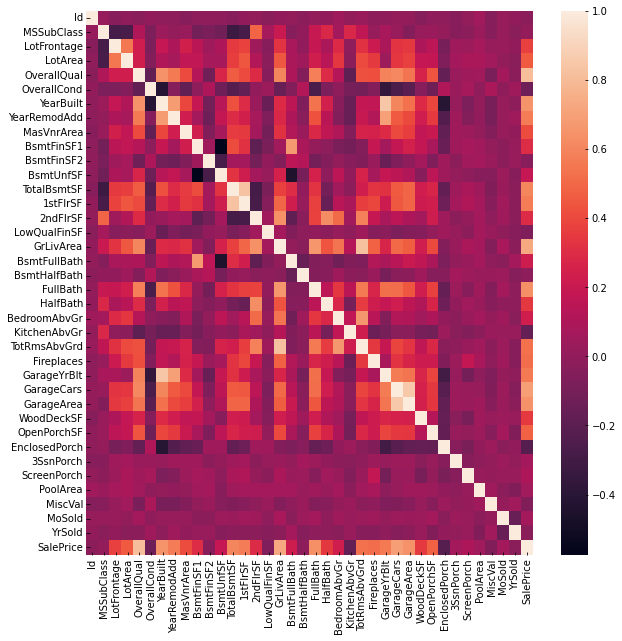

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))       
sns.heatmap(housedata_update.corr('spearman'), ax = ax)

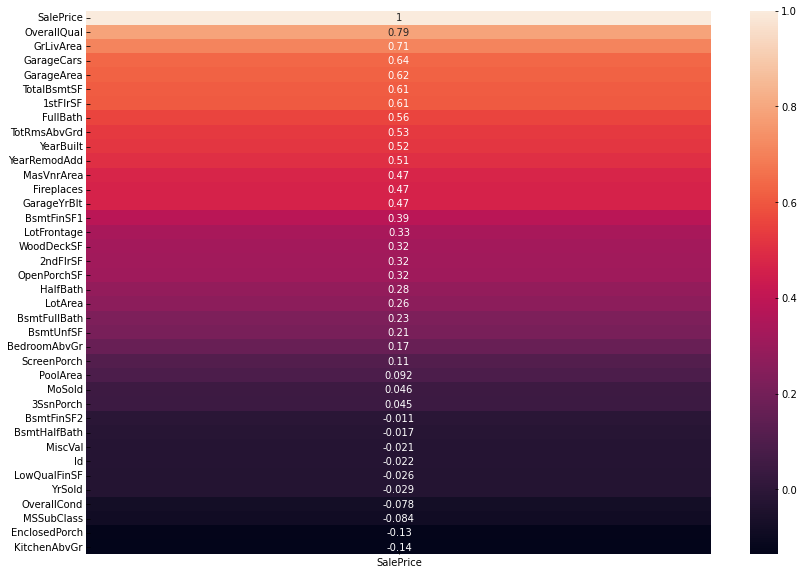

In [ ]:
corr_numerical = housedata_update.corr('pearson')[['SalePrice']].sort_values(by='SalePrice', ascending=False)
fig, ax = plt.subplots(figsize = (14,10))
sns.heatmap(corr_numerical, ax = ax, annot=True)

### Linear Regression

In [ ]:
#features = housedata_update[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 'SalePrice']]
features = housedata_update[['OverallQual', 'GrLivArea', 'GarageCars', 'SalePrice']]

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1460 non-null   int64
 1   GrLivArea    1460 non-null   int64
 2   GarageCars   1460 non-null   int64
 3   SalePrice    1460 non-null   int64
dtypes: int64(4)
memory usage: 45.8 KB


In [ ]:
features["OverallQual"] = features["OverallQual"].astype("object")
features["GarageCars"] = features["GarageCars"].astype("object")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OverallQual  1460 non-null   object
 1   GrLivArea    1460 non-null   int64 
 2   GarageCars   1460 non-null   object
 3   SalePrice    1460 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 45.8+ KB


In [ ]:
features_dummy = pd.get_dummies(features)
features_dummy.head()

,GrLivArea,SalePrice,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,GarageCars_0,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4
0,1710,208500,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1262,181500,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1786,223500,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1717,140000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,2198,250000,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
features_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   GrLivArea       1460 non-null   int64
 1   SalePrice       1460 non-null   int64
 2   OverallQual_1   1460 non-null   uint8
 3   OverallQual_2   1460 non-null   uint8
 4   OverallQual_3   1460 non-null   uint8
 5   OverallQual_4   1460 non-null   uint8
 6   OverallQual_5   1460 non-null   uint8
 7   OverallQual_6   1460 non-null   uint8
 8   OverallQual_7   1460 non-null   uint8
 9   OverallQual_8   1460 non-null   uint8
 10  OverallQual_9   1460 non-null   uint8
 11  OverallQual_10  1460 non-null   uint8
 12  GarageCars_0    1460 non-null   uint8
 13  GarageCars_1    1460 non-null   uint8
 14  GarageCars_2    1460 non-null   uint8
 15  GarageCars_3    1460 non-null   uint8
 16  GarageCars_4    1460 non-null   uint8
dtypes: int64(2), uint8(15)
memory usage: 44.3 KB


In [ ]:
# Pembagian X dan y
X = features_dummy.loc[:, features_dummy.columns != 'SalePrice']
y = features_dummy['SalePrice']

In [ ]:
# membagi X dan y ke dalam bentuk train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

In [ ]:
 # membuat linear regression object
reg = linear_model.LinearRegression()
 
# melakukan model training
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)

# regression intercept
print('Intercept: ', reg.intercept_)

Coefficients:  [ 4.19514818e+01 -6.44468964e+04 -6.51771179e+04 -7.15802883e+04
 -4.55131797e+04 -3.22454146e+04 -1.93077124e+04  8.05863248e+03
  4.73051941e+04  1.20461470e+05  1.22445313e+05 -3.67136670e+04
 -1.96463997e+04 -8.91201488e+02  3.88684007e+04  1.83828675e+04]
Intercept:  126448.76850636545


In [ ]:
y_pred = reg.predict(X_test)

### Evaluasi

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

23411.183141863654

In [ ]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1162948211.1045141

In [ ]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

34102.02649556935

In [ ]:
# R-Square
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8371290069923352

### Interpret using 3 columns

Variance score: 0.8371290069923352


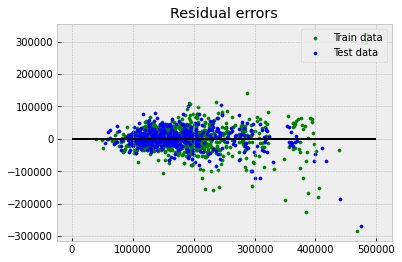

In [ ]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot untuk menampilkan residual error
 
## setting plot style
plt.style.use('bmh')
 
## plotting residual errors untuk training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors untuk test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting garis lurus untuk zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 500000, linewidth = 2)
 
## keterangan plotting
plt.legend(loc = 'upper right')
 
## Judul plot 
plt.title("Residual errors")
 
plt.show()

ketiga colom ini memiliki korelasi yg tinggi terhadap kolom saleprice yg berarti kolom ini memiliki pengaruh yang besar untuk menentukan houseprice

## 2. Classification Models

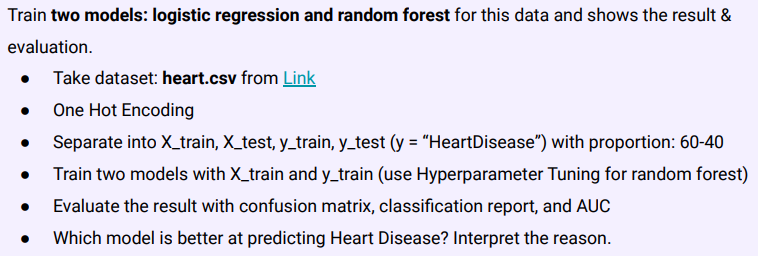

In [ ]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
## Cek perbandingan nilai
heart['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
# Resampling nilai agar sama rata dengan cara oversampling

from sklearn.utils import resample

## Buat dua kelas dataframe untuk masing-masing nilai
heart_majority = heart[(heart['HeartDisease']== 1 )] #Mayoritas
heart_minority = heart[(heart['HeartDisease']== 0 )] #MInoritas

## upsample minority class
heart_majority_downsampled = resample(heart_majority, 
                                 replace=True,  
                                 n_samples= 410, 
                                 random_state=42) 

## Gabungkan kelas dataframe mayoritas dengan kelas dataframe minoritas yang sudah di upsample
heart_upsampled = pd.concat([heart_majority_downsampled, heart_minority])

In [ ]:
heart_upsampled['HeartDisease'].value_counts()

1    410
0    410
Name: HeartDisease, dtype: int64

In [ ]:
#Lakukan One Hot Encoding
heart = pd.get_dummies(heart)
heart.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    uint8  
 8   Sex_M              918 non-null    uint8  
 9   ChestPainType_ASY  918 non-null    uint8  
 10  ChestPainType_ATA  918 non-null    uint8  
 11  ChestPainType_NAP  918 non-null    uint8  
 12  ChestPainType_TA   918 non-null    uint8  
 13  RestingECG_LVH     918 non-null    uint8  
 14  RestingECG_Normal  918 non-null    uint8  
 15  RestingECG_ST      918 non-null    uint8  
 16  ExerciseAngina_N   918 non

In [ ]:
# Bagikan data yang jadi bahan prediksi dengan target dengan menggunakan sumbu X dan y
X = heart.loc[:, heart.columns != 'HeartDisease']
y = heart["HeartDisease"]

In [ ]:
# split sumbu X and y menjadi data train dan data test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression menggunakan Limited-memory Broyden–Fletcher–Goldfarb–Shanno Solver
lr = LogisticRegression(solver='lbfgs', max_iter=1000) #max_iter = maksimal iterasi
lr = lr.fit(X_train, y_train)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

### Hyperparameter Tuning

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.8708611022955675

In [ ]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

### Evaluasi

In [ ]:
# Logistic Regression
y_lr = lr.predict(X_test)

# Random Forest Awal
y_rf_before = classifier_rf.predict(X_test)

# Random Forest Setelah Hyperparameter Tuning
y_rf_after = rf_best.predict(X_test)

In [ ]:
#Evaluasi Menggunakan Condusion Matrix

from sklearn.metrics import confusion_matrix
print("Logistic Regression : \n", confusion_matrix(y_test, y_lr))
print("Random Forest Awal : \n", confusion_matrix(y_test, y_rf_before))
print("Random Forest Setelah Hyperparameter Tuning : \n", confusion_matrix(y_test, y_rf_after))

Logistic Regression : 
 [[133  20]
 [ 29 186]]
Random Forest Awal : 
 [[128  25]
 [ 18 197]]
Random Forest Setelah Hyperparameter Tuning : 
 [[127  26]
 [ 20 195]]


In [ ]:
#Evaluasi Menggunakan AUC

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1)
print("Logistic Regression : ", auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf_before, pos_label=1)
print("Random Forest Awal : ", auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf_after, pos_label=1)
print("Random Forest Setelah Hyperparameter Tuning : ", (auc(fpr, tpr)))

Logistic Regression :  0.8671986624107006
Random Forest Awal :  0.8764401884784923
Random Forest Setelah Hyperparameter Tuning :  0.8685210518315852


In [ ]:
#Evaluasi Menggunakan Classification Report

from sklearn.metrics import classification_report
print("Logistic Regression : \n\n", classification_report(y_test, y_lr))
print("\n\nRandom Forest Awal : \n\n", classification_report(y_test, y_rf_before))
print("\n\nRandom Forest Setelah Hyperparameter Tuning : \n\n", classification_report(y_test, y_rf_after))

Logistic Regression : 

               precision    recall  f1-score   support

           0       0.82      0.87      0.84       153
           1       0.90      0.87      0.88       215

    accuracy                           0.87       368
   macro avg       0.86      0.87      0.86       368
weighted avg       0.87      0.87      0.87       368



Random Forest Awal : 

               precision    recall  f1-score   support

           0       0.88      0.84      0.86       153
           1       0.89      0.92      0.90       215

    accuracy                           0.88       368
   macro avg       0.88      0.88      0.88       368
weighted avg       0.88      0.88      0.88       368



Random Forest Setelah Hyperparameter Tuning : 

               precision    recall  f1-score   support

           0       0.86      0.83      0.85       153
           1       0.88      0.91      0.89       215

    accuracy                           0.88       368
   macro avg       0.87   

### Conclusion

Setelah melakukan serangkaian metode evaluasi, bisa disimpulkan bahwa model dengan skor terbaik adalah model yang dilakukan oleh **Random Forest Awal.** Dengan rincian : <br><br>
1. Confusion Matrix = TPs dan TNs Random Forest Awal Lebih tinggi dibandingkan dengan lainnya.
2. AUC = Random Forest Awal mendapatkan skor tertinggi tinggi dibandingkan dengan lainnya.
3. Classification Score = Random Forest Awal mendapatkan skor tertinggi tinggi dibandingkan dengan lainnya.